In [1]:
!pip install pyodbc

In [7]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 861.6 kB/s eta 0:00:0000:0100:01


In [44]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [46]:
!pip3 install pymysql
!pip3 install ipython-sql
!pip3 install mysqlclient

  Using cached mysqlclient-2.2.6.tar.gz (91 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      /bin/sh: pkg-config: command not found
      /bin/sh: pkg-config: command not found
      /bin/sh: pkg-config: command not found
      /bin/sh: pkg-config: command not found
      Trying pkg-config --exists mysqlclient
      Command 'pkg-config --exists mysqlclient' returned non-zero exit status 127.
      Trying pkg-config --exists mariadb
      Command 'pkg-config --exists mariadb' returned non-zero exit status 127.
      Trying pkg-config --exists libmariadb
      Command 'pkg-config --exists libmariadb' returned non-zero exit status 127.
      Trying pkg-config --exists perconaserverclient
      Command 'pkg-config --exists perconaserverclient' returned non-zero exit status 127.
      Tracebac

In [48]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [50]:
# Database connection details
db_name = "SPARESPA"
db_host = "localhost"
db_username = "root"
db_password = "kalp1231"

In [52]:
try:
    # Establish the connection
    conn = pymysql.connect(
        host=db_host,
        port=3306,
        user=db_username,
        passwd=db_password,
        db=db_name
    )
    print("Connection successful!")

except Exception as e:
    print("Error:", e)

Connection successful!


In [54]:
cursor = conn.cursor()
query = "SELECT * FROM customer"
cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(row)
cursor.close()

(1, 'Newton Harnor', '253-419-1771', 'Tacoma', 'newton.harnor@gmail.com')
(2, 'Tomaso Voisey', '330-079-3654', 'Akron', 'tomaso.voisey@yahoo.co.uk')
(3, 'Margery Glover', '785-292-5555', 'Topeka', 'margery.glover@hotmail.com')
(4, 'Ellswerth Yellowley', '785-140-9222', 'Topeka', 'ellswerth.yellowley@yahoo.com')
(5, 'Brose Sales', '918-017-6975', 'Tulsa', 'brose.sales@juno.com')
(6, 'Alastair Pauluzzi', '254-271-7073', 'Waco', 'alastair.pauluzzi@yahoo.com')
(7, 'Paddy Ruppelin', '304-148-2987', 'Huntington', 'paddy.ruppelin@hotmail.com')
(8, 'Emile Gery', '540-304-0896', 'Roanoke', 'emile.gery@yahoo.com')
(9, 'Anabel Ferres', '806-427-3201', 'Amarillo', 'anabel.ferres@yahoo.com')
(10, 'Euphemia Money', '615-980-1867', 'Nashville', 'euphemia.money@hotmail.fr')
(11, 'Meier Wyre', '305-425-9373', 'Miami', 'meier.wyre@yahoo.com')
(12, 'Jerrine Tyne', '208-160-2863', 'Pocatello', 'jerrine.tyne@hotmail.com')
(13, 'Ivett Gethings', '562-361-0834', 'Long Beach', 'ivett.gethings@msn.com')
(14, '

In [56]:
df = pd.read_sql("SELECT * FROM customer", conn)
print(df.head())

   c_id                 name         phone address  \
0     1        Newton Harnor  253-419-1771  Tacoma   
1     2        Tomaso Voisey  330-079-3654   Akron   
2     3       Margery Glover  785-292-5555  Topeka   
3     4  Ellswerth Yellowley  785-140-9222  Topeka   
4     5          Brose Sales  918-017-6975   Tulsa   

                           email  
0        newton.harnor@gmail.com  
1      tomaso.voisey@yahoo.co.uk  
2     margery.glover@hotmail.com  
3  ellswerth.yellowley@yahoo.com  
4           brose.sales@juno.com  


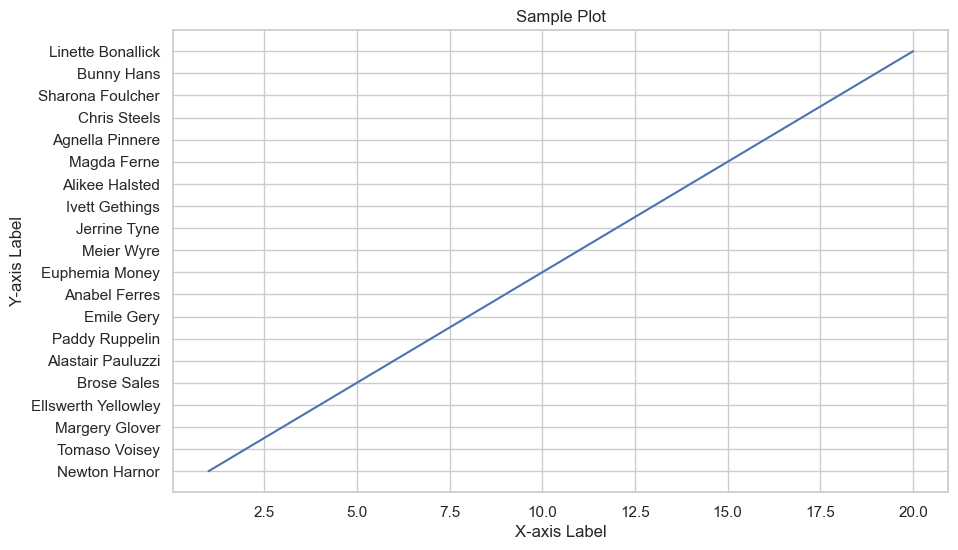

In [58]:
query = "SELECT c_id, name FROM customer"
df = pd.read_sql(query, conn)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['c_id'], df['name'])
plt.title("Sample Plot")
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.show()

In [60]:
# Check existing tables in the database
cursor = conn.cursor()
cursor.execute("SHOW TABLES;")
tables = cursor.fetchall()
print("Tables in the SPARESPA database:")
for table in tables:
    print(table[0])

Tables in the SPARESPA database:
customer
delivery
manufacture purchase
manufacturer
payments
product
purchase_order
purchase_order_detail
sales_order_detail
salesorder


In [62]:
tables = [
    "customer", "delivery", "`manufacture purchase`", "manufacturer",
    "payments", "product", "purchase_order_detail", "purchase_order",
    "sales_order_detail", "salesorder"  # Corrected table name here
]

dataframes = {}
for table in tables:
    try:
        df = pd.read_sql(f"SELECT * FROM {table}", conn)
        dataframes[table.strip('`')] = df
        print(f"Loaded table: {table}")
    except Exception as e:
        print(f"Error loading table {table}: {e}")

Loaded table: customer
Loaded table: delivery
Loaded table: `manufacture purchase`
Loaded table: manufacturer
Loaded table: payments
Loaded table: product
Loaded table: purchase_order_detail
Loaded table: purchase_order
Loaded table: sales_order_detail
Loaded table: salesorder


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

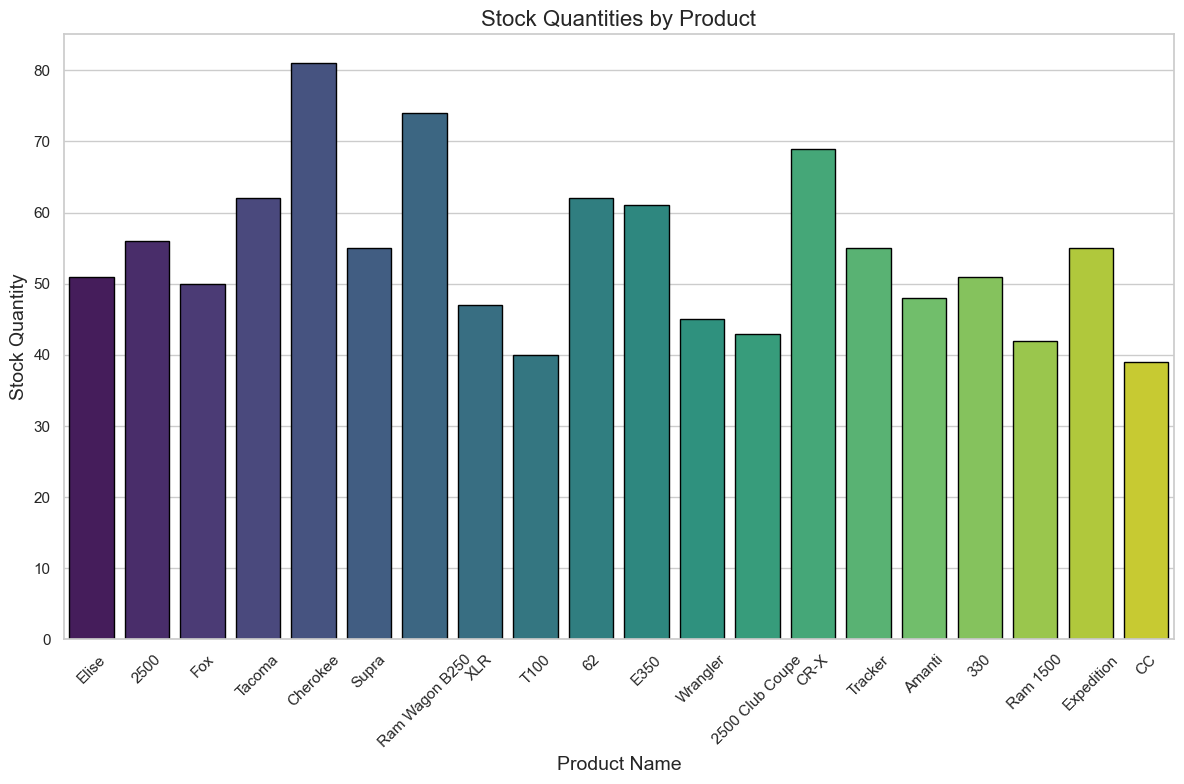

In [66]:
sns.set_theme(style="whitegrid")

#1) Bar plot 
product_df = dataframes["product"]
plt.figure(figsize=(12, 8))
sns.barplot(
    x='product_name', 
    y='stock_quantity', 
    data=product_df, 
    palette='viridis',
    edgecolor='black'  # Add black outline to the bars
)
plt.title("Stock Quantities by Product", fontsize=16)
plt.xlabel("Product Name", fontsize=14)
plt.ylabel("Stock Quantity", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

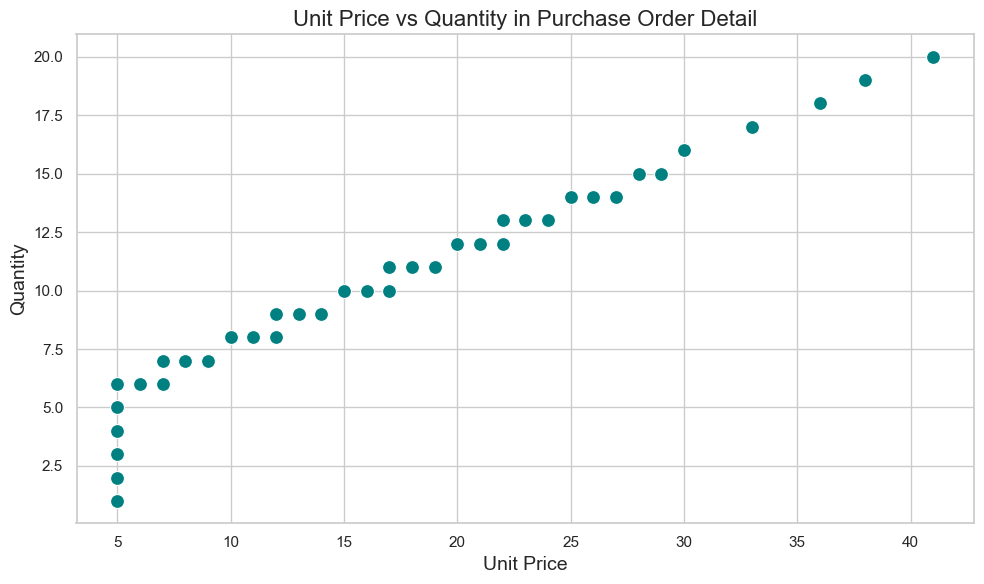

In [68]:
#2) Scatter plot 
purchase_order_detail_df = dataframes["purchase_order_detail"]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='unit_price', y='quantity', data=purchase_order_detail_df, s=100, color='teal')
plt.title("Unit Price vs Quantity in Purchase Order Detail", fontsize=16)
plt.xlabel("Unit Price", fontsize=14)
plt.ylabel("Quantity", fontsize=14)
plt.tight_layout()
plt.show()

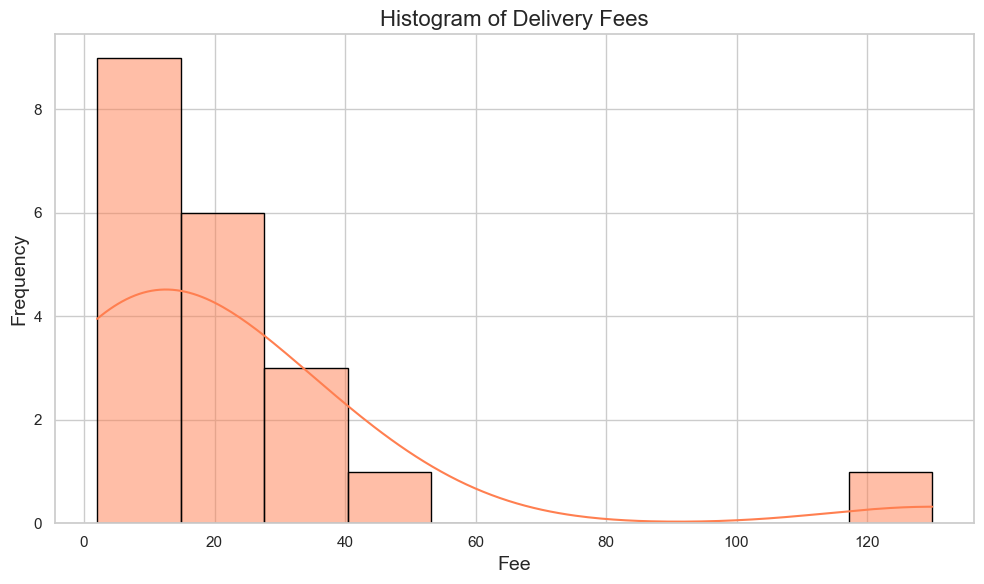

In [70]:
#3) Histogram 
delivery_df = dataframes["delivery"]

plt.figure(figsize=(10, 6))
sns.histplot(
    delivery_df['fee'], 
    bins=10, 
    kde=True, 
    color='coral', 
    edgecolor='black'  # Add black outline to bars
)
plt.title("Histogram of Delivery Fees", fontsize=16)
plt.xlabel("Fee", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

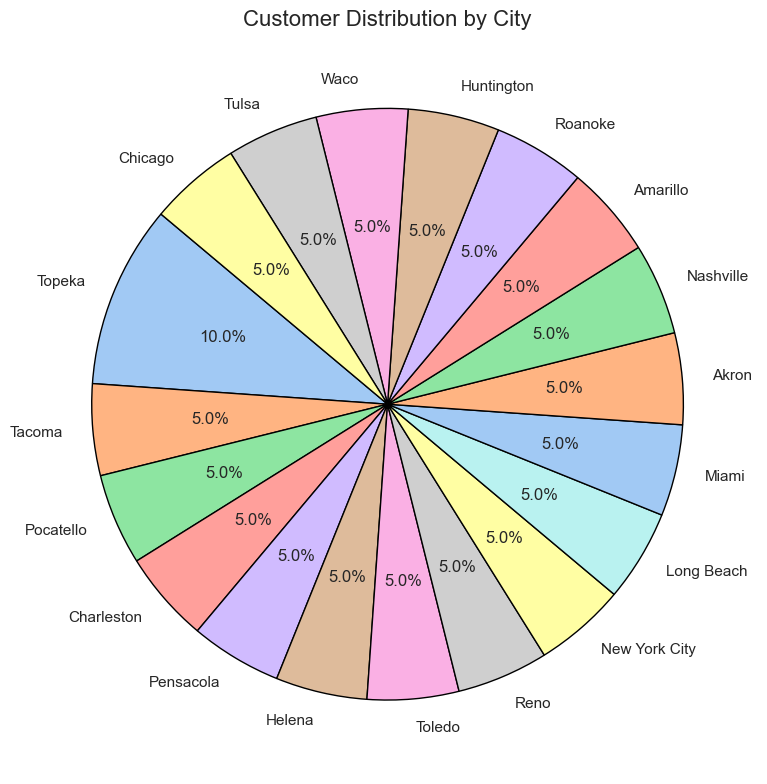

In [72]:
#4) Pie chart example
customer_df = dataframes["customer"]
customer_city_counts = customer_df['address'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(
    customer_city_counts, 
    labels=customer_city_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("pastel"),
    wedgeprops={"edgecolor": "black"}  # Add black outline
)
plt.title("Customer Distribution by City", fontsize=16)
plt.tight_layout()
plt.show()

#### Visulization with Queries

In [74]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Define the execute_query function
def execute_query(query, connection):
    try:
        # Execute the query and fetch data
        data = pd.read_sql_query(query, connection)
        return data
    except Exception as e:
        print(f"Error executing query: {e}")
        return None

Query 1 Results:
    product_id  total_orders
0            4             9
1            9             8
2           15             8
3           14             7
4           13             7
5           10             6
6           18             6
7           19             6
8            7             5
9            5             5
10          17             5
11           2             5
12          16             5
13          11             4
14          12             4
15           8             3
16           1             3
17          20             2
18           6             1
19           3             1


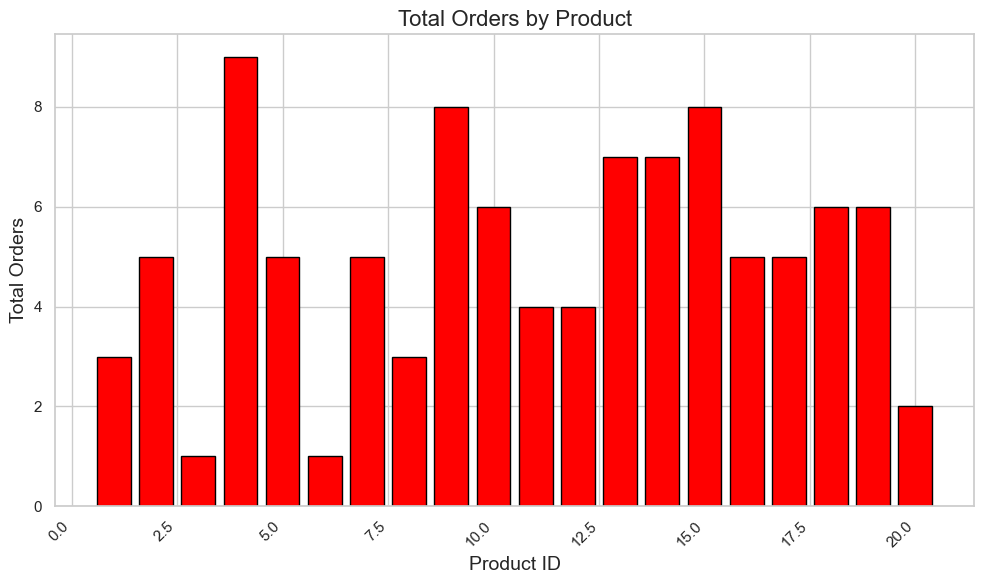

In [76]:
# Query 1: Count of Orders by Product
query1 = """
SELECT product_id, COUNT(*) AS total_orders
FROM sales_order_detail
GROUP BY product_id
ORDER BY total_orders DESC;
"""

# Execute the query
orders_data = execute_query(query1, conn)

# Check if data was retrieved
if orders_data is not None and not orders_data.empty:
    print("Query 1 Results:")
    print(orders_data)

    # Bar Plot (Visualization)
    plt.figure(figsize=(10, 6))
    plt.bar(orders_data['product_id'], orders_data['total_orders'], color='red', edgecolor='black')
    plt.title('Total Orders by Product', fontsize=16)
    plt.xlabel('Product ID', fontsize=14)
    plt.ylabel('Total Orders', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

else:
    print("No data to visualize.")

Query 2 Results:
     product_name  stock_quantity
0        Cherokee              81
1  Ram Wagon B250              74
2            CR-X              69
3          Tacoma              62
4              62              62


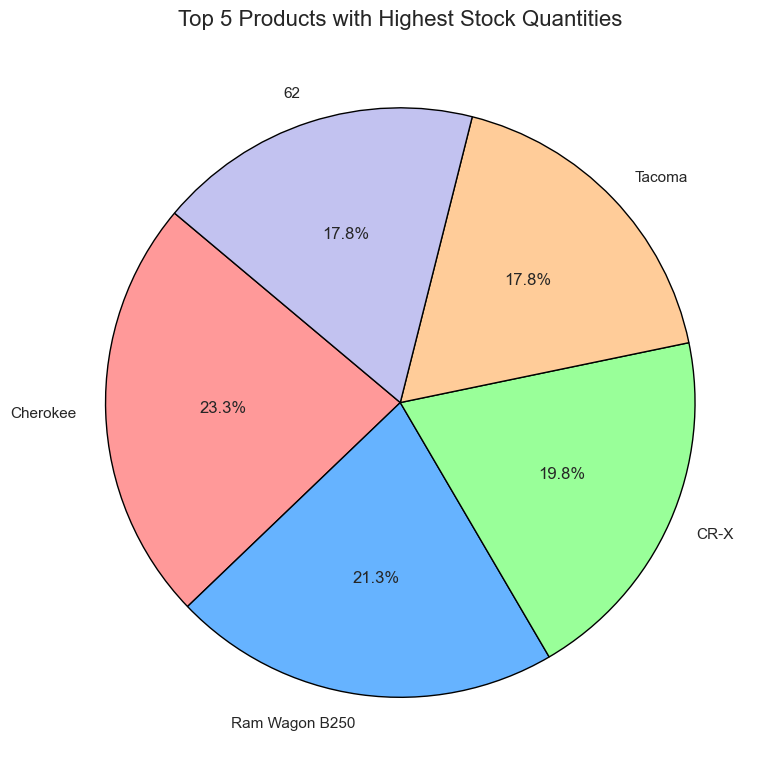

In [78]:
# Query 2: Top 5 Products with the Highest Stock Quantities
query2 = """
SELECT product_name, stock_quantity
FROM product
ORDER BY stock_quantity DESC
LIMIT 5;
"""

# Execute the query
top_stock_products = execute_query(query2, conn)

# Check if data was retrieved
if top_stock_products is not None and not top_stock_products.empty:
    print("Query 2 Results:")
    print(top_stock_products)

  # Pie Chart (Visualization)
    plt.figure(figsize=(8, 8))
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']  # Define a list of colors
    plt.pie(
    top_stock_products['stock_quantity'], 
    labels=top_stock_products['product_name'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,  # Use the defined color list
    wedgeprops={'edgecolor': 'black'}  # Add black borders
    )
    plt.title('Top 5 Products with Highest Stock Quantities', fontsize=16)
    plt.tight_layout()
    plt.show()

else:
    print("No data to visualize.")

Query 3 Results:
      product_name  quantity
0              Fox         8
1  2500 Club Coupe         1
2               62         7
3           Amanti        11
4           Amanti         9
5       Expedition        10
6             T100        15
7           Tacoma         5
8               62        14
9             T100        15


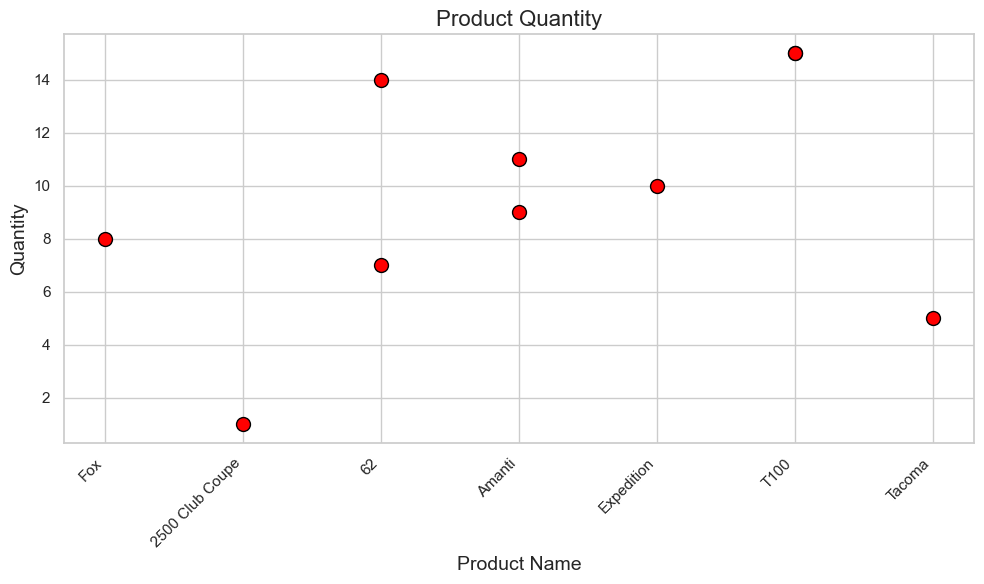

In [80]:
# Query 3: Listing All Products with Associated Purchase Order Details Limiting to 10
query3 = """
SELECT p.product_name, pod.quantity
FROM product p
RIGHT JOIN purchase_order_detail pod ON p.Product_id = pod.Product_id
LIMIT 10;
"""

# Execute the query
result = execute_query(query3, conn)

# Check if data was retrieved
if result is not None and not result.empty:
    print("Query 3 Results:")
    print(result)

    # Scatter Plot (Visualization)
    plt.figure(figsize=(10, 6))
    plt.scatter(result['product_name'], result['quantity'], color='red', s=100, edgecolor='black')
    plt.title('Product Quantity', fontsize=16)
    plt.xlabel('Product Name', fontsize=14)
    plt.ylabel('Quantity', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

else:
    print("No data retrieved or query returned empty results.")

In [82]:
# Close the database connection
conn.close()